<a href="https://www.kaggle.com/code/vijays140291/randomforest-r2score-80?scriptVersionId=124387412" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Trying the Predict Ticket Price for the flight based on given features

In [329]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [330]:
#loading the dataset
import pandas as pd
df=pd.read_csv('/kaggle/input/comprehensive-flight-data-from-priceline/flight.csv')
#showing the dataset
df

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (4,11,12,36,37,38,39,40,42,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,86,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,108,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,130,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,152,154,155,156,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,174,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,218,220,221,222,224,225,227,228,229,230,231,232,233,234,235,236,237,238,240,242,243,244,246,247,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,284,286,287,288,289,290,291,293,294,295,296,297,298,2

,Airline name,Travel Time,Unnamed: 2,Number of Stoppage,Ticket prize(Doller),Depreture Airport,Depreture Time,1st Stoppage Waiting Hour,1st Stoppage,2nd StoppageWaiting Time,2nd Stoppage,3rd Stoppage Waiting time,3rd Stoppage,Destination Airport,Arrival Time,Arrival Date,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260,Unnamed: 261,Unnamed: 262,Unnamed: 263,Unnamed: 264,Unnamed: 265,Unnamed: 266,Unnamed: 267,Unnamed: 268,Unnamed: 269,Unnamed: 270,Unnamed: 271,Unnamed: 272,Unnamed: 273,Unnamed: 274,Unnamed: 275,Unnamed: 276,Unnamed: 277,Unnamed: 278,Unnamed: 279,Unnamed: 280,Unnamed: 281,Unnamed: 282,Unnamed: 283,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287,Unnamed: 288,Unnamed: 289,Unnamed: 290,Unnamed: 291,Unnamed: 292,Unnamed: 293,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 298,Unnamed: 299,Unnamed: 300,Unnamed: 301,Unnamed: 302,Unnamed: 303,Unnamed: 304,Unnamed: 305,Unnamed: 306,Unnamed: 307,Unnamed: 308,Unn

# Preproccessing Inputs

In [331]:
def onehot_encode(df,columns):
    for column in columns:
        dummies=pd.get_dummies(df[column],prefix=column)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [332]:
def preprocess_inputs(df):
    df=df.copy()
    #dropping the missing values with more then 50 percent
    COLUMNS=df.columns[df.isna().mean()>0.5]
    #extracting the numerical values from number of stoppage
    df=df.drop(COLUMNS,axis=1)
    df['Number of  Stoppage ']=df['Number of  Stoppage '].apply(lambda x:x.split(" ")[0])
    
    df['1st Stoppage Waiting Hour']=df['1st Stoppage Waiting Hour'].fillna(df['1st Stoppage Waiting Hour'].mode()[0])
    

    
    df['1st Stoppage Waiting Hour Part']=df['1st Stoppage Waiting Hour'].apply(lambda x:x.split(' ')[0][:-1] if len(x.split(' '))>1 else np.NaN)
    df['1st Stoppage Waiting in Minute Part']=df['1st Stoppage Waiting Hour'].apply(lambda x:x.split(' ')[1][:-1] if  len(x.split(' '))>1 else x.split(' ')[0][:-1])
    
    
    df['1st Stoppage Waiting Hour Part']=df['1st Stoppage Waiting Hour Part'].replace({'Sig':np.NaN})
    df['1st Stoppage Waiting Hour Part']=df['1st Stoppage Waiting Hour Part'].astype(np.float)
    df['1st Stoppage Waiting Hour Part']=df['1st Stoppage Waiting Hour Part'].fillna(df['1st Stoppage Waiting Hour Part'].mean())
    df['1st Stoppage Waiting in Minute Part']=df['1st Stoppage Waiting in Minute Part'].replace({'i':np.NaN})
    df['1st Stoppage Waiting in Minute Part']=df['1st Stoppage Waiting in Minute Part'].astype(np.float)
    df['1st Stoppage Waiting in Minute Part']=df['1st Stoppage Waiting in Minute Part'].fillna(df['1st Stoppage Waiting in Minute Part'].mean())
    
    df['Travel Time Hour']=df['Travel  Time'].apply(lambda x:x.split(' ')[0][:-1])
    df['Travel Time Minutes']=df['Travel  Time'].apply(lambda x:x.split(' ')[1][:-1])
    df=df.drop('Travel  Time',axis=1)
    df=df.drop('Arrival Date',axis=1)
    
    df['Depreture Time']=df['Depreture Time'].fillna(df['Depreture Time'].mode()[0])
    
    df['Departure Hour']=df['Depreture Time'].apply(lambda x:x.split(':')[0])
    df['Departure a/p']=df['Depreture Time'].apply(lambda x:x[-1]).replace({'a':0,'p':1})
    df=df.drop('1st Stoppage Waiting Hour',axis=1)
    df['Arrival Time']=df['Arrival Time'].fillna(df['Arrival Time'].mode()[0])
    df['Arrival Hour']=df['Arrival Time'].apply(lambda x:x.split(':')[0])
    df['Arrival a/p']=df['Arrival Time'].apply(lambda x:x[-1]).replace({'a':0,'p':1})
    df=df.drop(['Depreture Time','Arrival Time'],axis=1)
    
    
    for column in ['Airline name ', 'Ticket prize(Doller)', 'Depreture  Airport','1st Stoppage', 'Destination Airport']:
        df[column]=df[column].fillna(df[column].mode()[0])
    
    
    df['Number of  Stoppage ']=df['Number of  Stoppage '].replace({'Nonstop':0,'EXPRESS':0}).astype(np.int)
    
    df['Ticket prize(Doller)']=df['Ticket prize(Doller)'].replace({'Alaska':np.NaN,'$':np.NaN}).astype(np.float)
    
    
    df['Ticket prize(Doller)']=df['Ticket prize(Doller)'].fillna(df['Ticket prize(Doller)'].mean())
    
    
    #['Travel Time Hour', 'Travel Time Minutes', 'Departure Hour','Departure a/p', 'Arrival Hour']:
    df['Travel Time Hour']=df['Travel Time Hour'].replace({'Sav':np.NaN}).astype(np.float)
    df['Travel Time Hour']=df['Travel Time Hour'].fillna(df['Travel Time Hour'].mean())
    
    df['Travel Time Minutes']=df['Travel Time Minutes'].replace({'$39':np.NaN}).astype(np.float)
    
    
    df['Travel Time Minutes']=df['Travel Time Minutes'].fillna(df['Travel Time Minutes'].mean())
    
    
    df['Departure Hour']=df['Departure Hour'].replace({'Sign in':np.NaN}).astype(np.float)
    
    df['Departure Hour']=df['Departure Hour'].fillna(df['Departure Hour'].mean())
    
    df['Departure a/p']=df['Departure a/p'].replace({'n':np.NaN}).astype(np.float)
    
    df['Departure a/p']=df['Departure a/p'].fillna(df['Departure a/p'].mean())
    
    
    df['Arrival Hour']=df['Arrival Hour'].replace({'Delta':np.NaN}).astype(np.float)
    
    df['Arrival Hour']=df['Arrival Hour'].fillna(df['Arrival Hour'].mean())
    
    df=onehot_encode(df,df.select_dtypes('object').columns)
    
    
    y=df['Ticket prize(Doller)']
    x=df.drop('Ticket prize(Doller)',axis=1)
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
    
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    
    
    
    return x_train,x_test,y_train,y_test


In [339]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1722, 179)
(739, 179)
(1722,)
(739,)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: `np.int` is a deprecated alias for th

# Training the Model

In [340]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.80251630062925


In [354]:
y_pred=model.predict(x_test)
root_mean_square_error=np.sqrt(np.mean((y_pred-y_test)**2))
print('Root mean square error',root_mean_square_error)

Root mean square error 376.2767971773254


# Plotting the Result

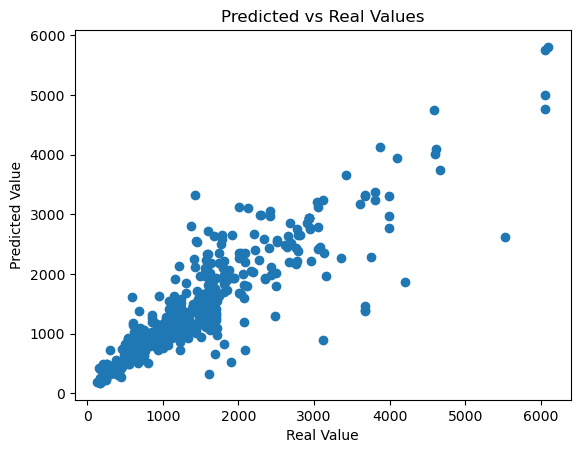

In [343]:
plt.scatter(x=y_test,y=y_pred)
plt.title('Predicted vs Real Values')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.show()